## Student Performance Indicator

### Lifecycle of the Machine Learning Project

1. Understand The Problem Statement
2. Data Collection
3. Data Checks
4. Exploratory Data Analysis
5. Data Pre-Processing
6. Model Training
7. Choose The Best Model

### 1. Problem Statement

This project helps us understand the student performance based on the test scores and how it is affected by other variables such as the parental income, gender, ethnicity, lunch and test preparation course.

### 2. Dataset Collection

The data is collected from Kaggle. It consists of 8 columns and 1000 rows.

### 2.1 Import Data and Required Packages

Import pandas, numpy, matplotlib, seaborn and warnings below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   

### Load the dataset

In [34]:
## additional checks for processing NoneType as a category
df = pd.read_csv("data/stud.csv", na_values=[], keep_default_na=False)

### Top 5 Records

In [35]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Check the shape of the dataset

In [36]:
df.shape

(1000, 8)

### 2.2 Dataset Information

1. Gender : Categorical, Male/Female
2. Ethnicity: Categorical, A/B/C/D
3. Parental Level: Categorical, Bachelors/Masters/Some College/Associate/High School
4. Lunch: Categorical, Standard/Free
5. Test Preparation Course: Categorical, Complete/Incomplete
6. Math Score: Numerical
7. Reading Score: Numerical
8. Writing Score: Numerical


### 3.1 Data Checks To Perform

1. Check Missing Values
2. Check Duplicates
3. Check Data Types
4. Check Unique Values Per Column
5. Check Statistics 
6. Check Various Categories Present In Each Column

### 3.1 Check Missing Values

In [37]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 3.2 Check Duplicates

In [38]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

### 3.3 Check Data Types

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Check Unique Values Per Columns

In [40]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check Statistics

In [41]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observations

1. From above description of numerical data, all the mean values are close to each other
2. Standard descriptions are also close
3. Min score for Math is 0

### 3.6 Exploring Data

In [42]:
## gender category
print("categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

categories in 'gender' variable:  ['female' 'male']


In [43]:
## race/ethnicity category
print("categories in race/ethnicity variable: ", end=" ")
print(df['race_ethnicity'].unique())

categories in race/ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']


In [44]:
## parental level of education category
print("categories at parental level of income: ", end = " ")
print(df['parental_level_of_education'].unique())

categories at parental level of income:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [45]:
## lunch categories
print("categories in lunch variable: ", end = " ")
print(df['lunch'].unique())

categories in lunch variable:  ['standard' 'free/reduced']


In [ ]:
## test_preparation_course categories
print("categories in test preparation course variable: ", end = " ")
print(df['test_preparation_course'].unique())
## in case of none values, can also use :
# df['test_preparation_course'] = df['test_preparation_course'].astype('category')

categories in test preparation course variable:  ['none' 'completed']


In [54]:
## define the numerical and categorical variables
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [57]:
print(f"Number of numerical features are: {len(numeric_features)} and they are: {numeric_features}")
print(f"Number of categorical features are: {len(categorical_features)} and they are: {categorical_features}")

Number of numerical features are: 3 and they are: ['math_score', 'reading_score', 'writing_score']
Number of categorical features are: 5 and they are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.7 Adding columns for "Total Score" and "Average" - Feature Engineering

In [59]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
## Find the number of students with perfect scores across all subjects and having a valid average score
perfect_score_math = df[df["math_score"] == 100]["average_score"].count()
perfect_score_reading = df[df["reading_score"] == 100]["average_score"].count()
perfect_score_writing = df[df["writing_score"] == 100]["average_score"].count()

In [79]:
print(f" Number of students with perfect math scores are: {perfect_score_math}\n", 
      f"Number of students with perfect reading scores are: {perfect_score_reading}\n",
      f"Number of students with perfect writing scores are: {perfect_score_writing}")

 Number of students with perfect math scores are: 7
 Number of students with perfect reading scores are: 17
 Number of students with perfect writing scores are: 14


In [80]:
## Find the number of students failing across all subjects
failing_math = df[df["math_score"] < 30]["average_score"].count()
failing_reading = df[df["reading_score"] < 30]["average_score"].count()
failing_writing = df[df["writing_score"] < 30]["average_score"].count()

In [82]:
print(f" Number of students who failed math are: {failing_math}\n", 
      f"Number of students who failed reading are: {failing_reading}\n",
      f"Number of students who failed writing are: {failing_writing}")

 Number of students who failed math are: 14
 Number of students who failed reading are: 8
 Number of students who failed writing are: 9


### Observations:
1. Maximum students have failed math
2. Maximum students have a perfect score in reading

### 4.1 Visualize Average Score Distribution 
1. Histogram
2. Kernel Distribution Function (KDE)

### 4.1.1 Histogram and KDE

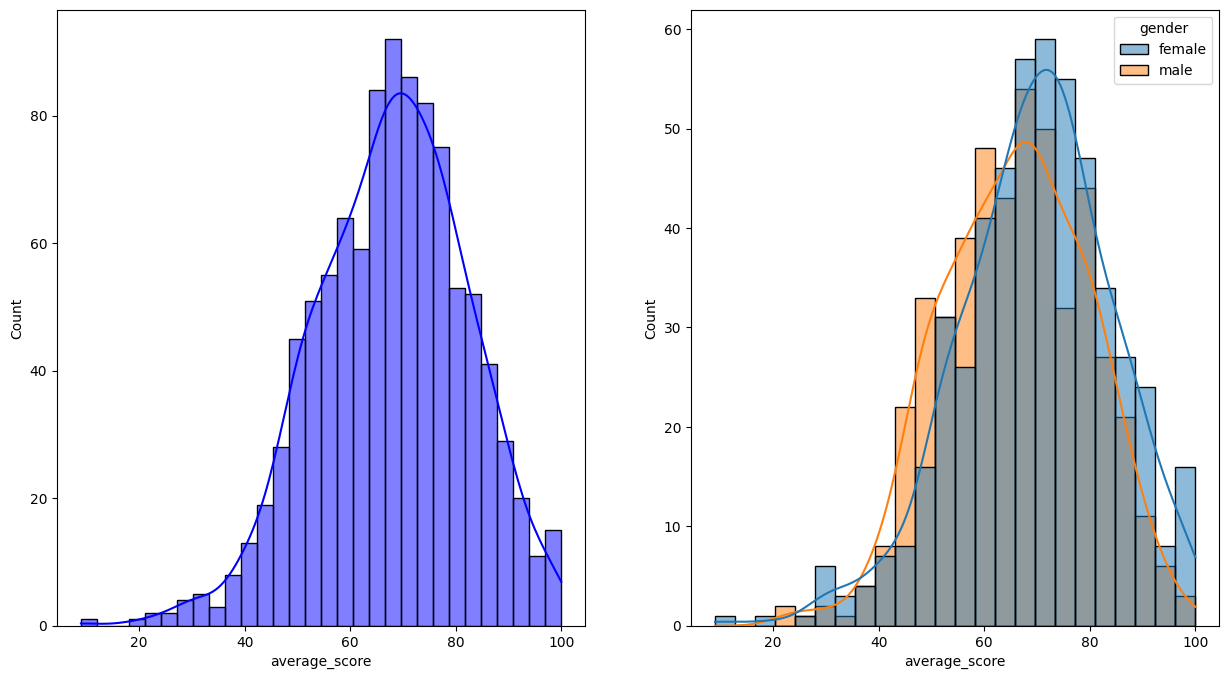

In [ ]:
plt.subplots(1, 2, figsize=(15, 8))
plt.subplot(121)
sns.histplot(data = df, x = "average_score", bins = 30, kde = True, color = 'blue')
plt.subplot(122)
sns.histplot(data = df, x = "average_score", kde = True, hue = 'gender')
plt.show()

### Observation:

Females tend to perform better than males

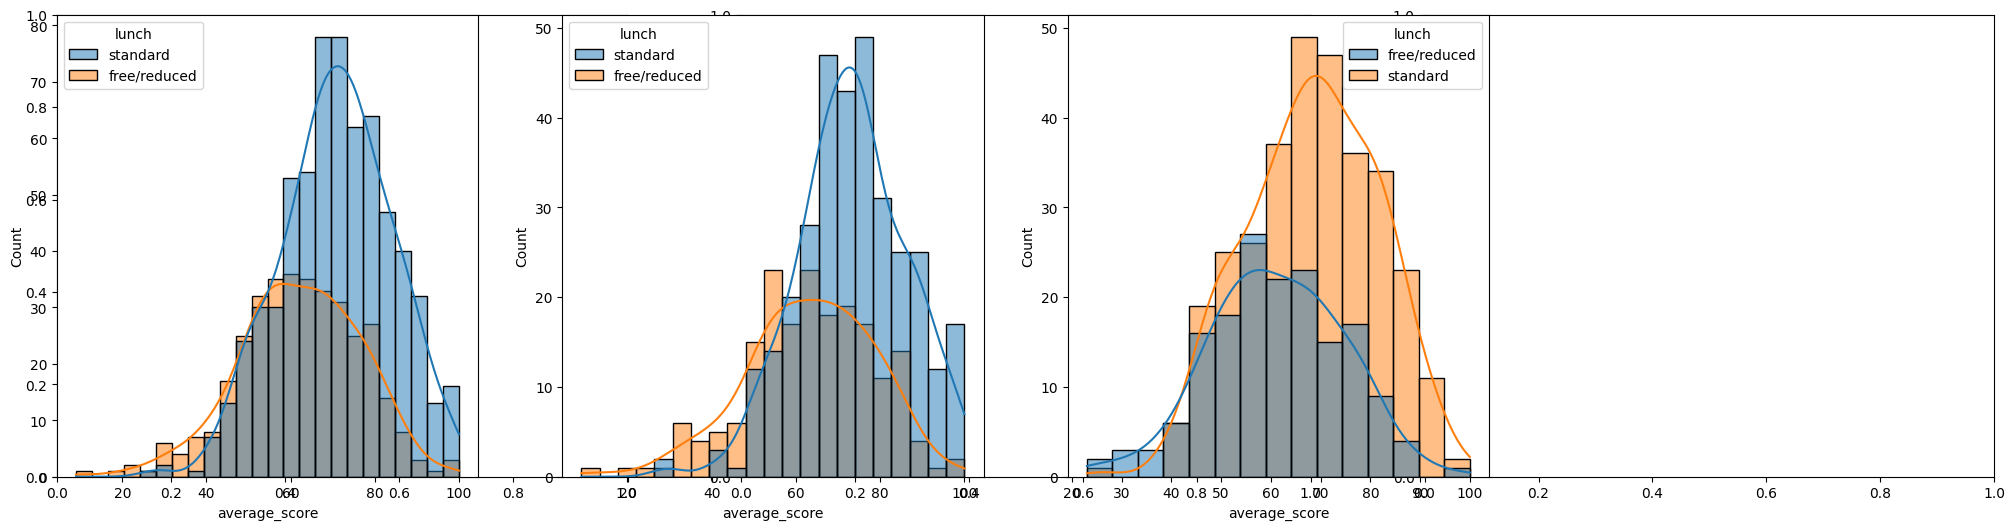

In [ ]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = "average_score", kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == "female"], x = "average_score", kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == "male"], x = "average_score", kde = True, hue = 'lunch')
plt.show()

### Observations:
1. Standard lunch students have higher average scores than free/reduced lunch students.

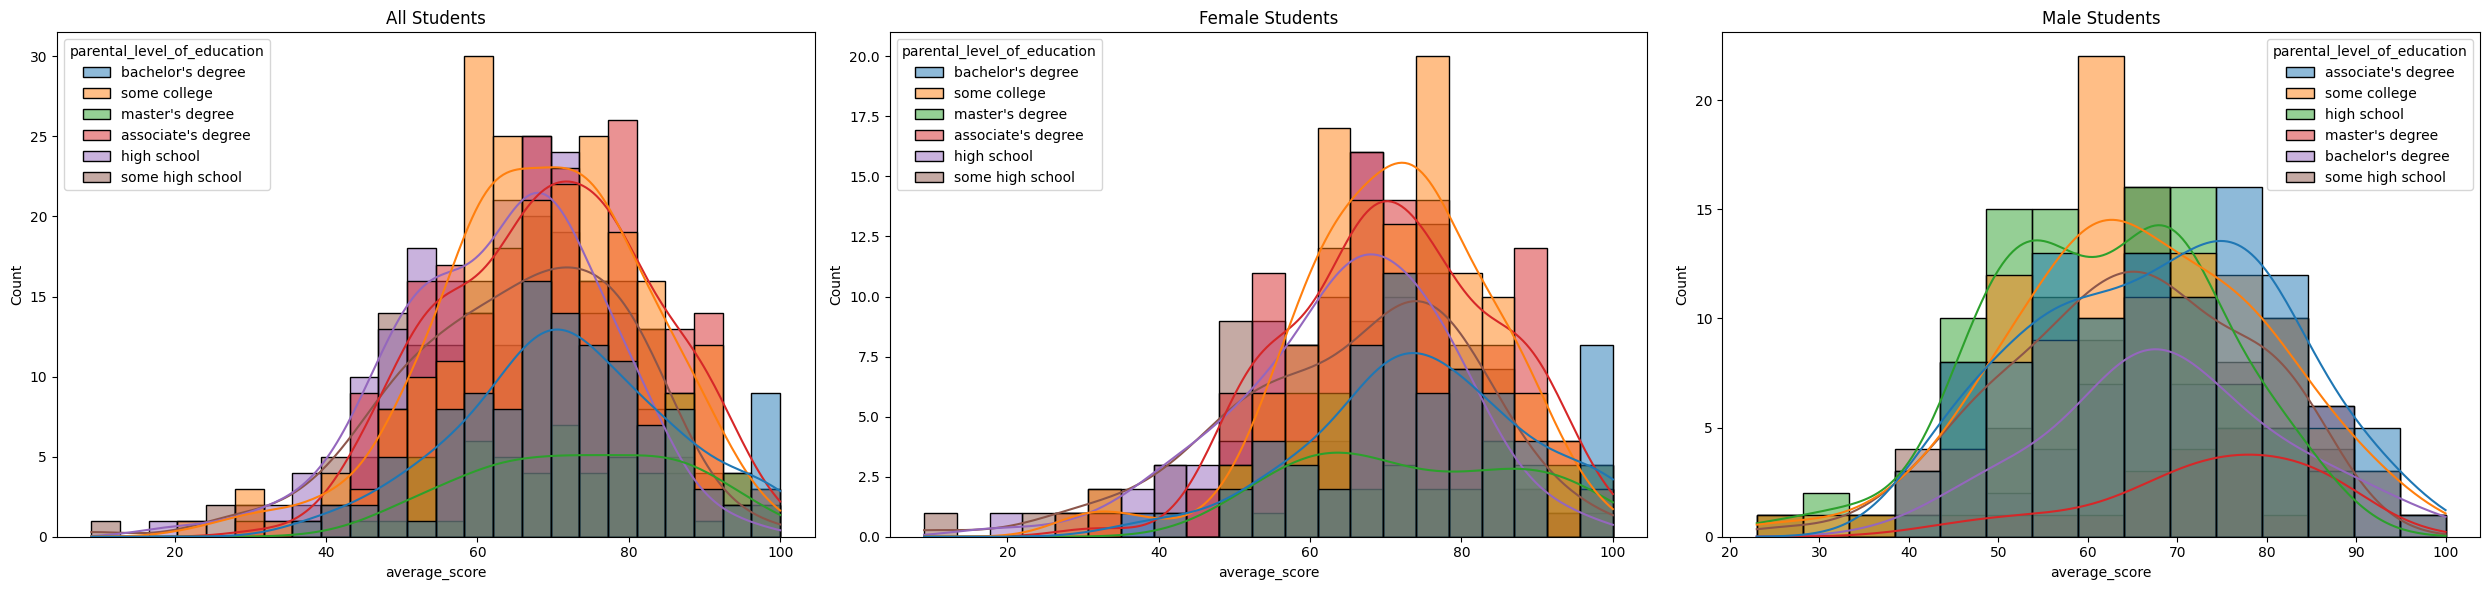

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x="average_score", kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title("All Students")


sns.histplot(data=df[df.gender == "female"], x="average_score", kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title("Female Students")


sns.histplot(data=df[df.gender == "male"], x="average_score", kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title("Male Students")

plt.tight_layout()
plt.show()

### Observation:

1. In general parent's education don't help student perform well in exam.
2. 2nd plot we can see there is no effect of parent's education on female students.
3. 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

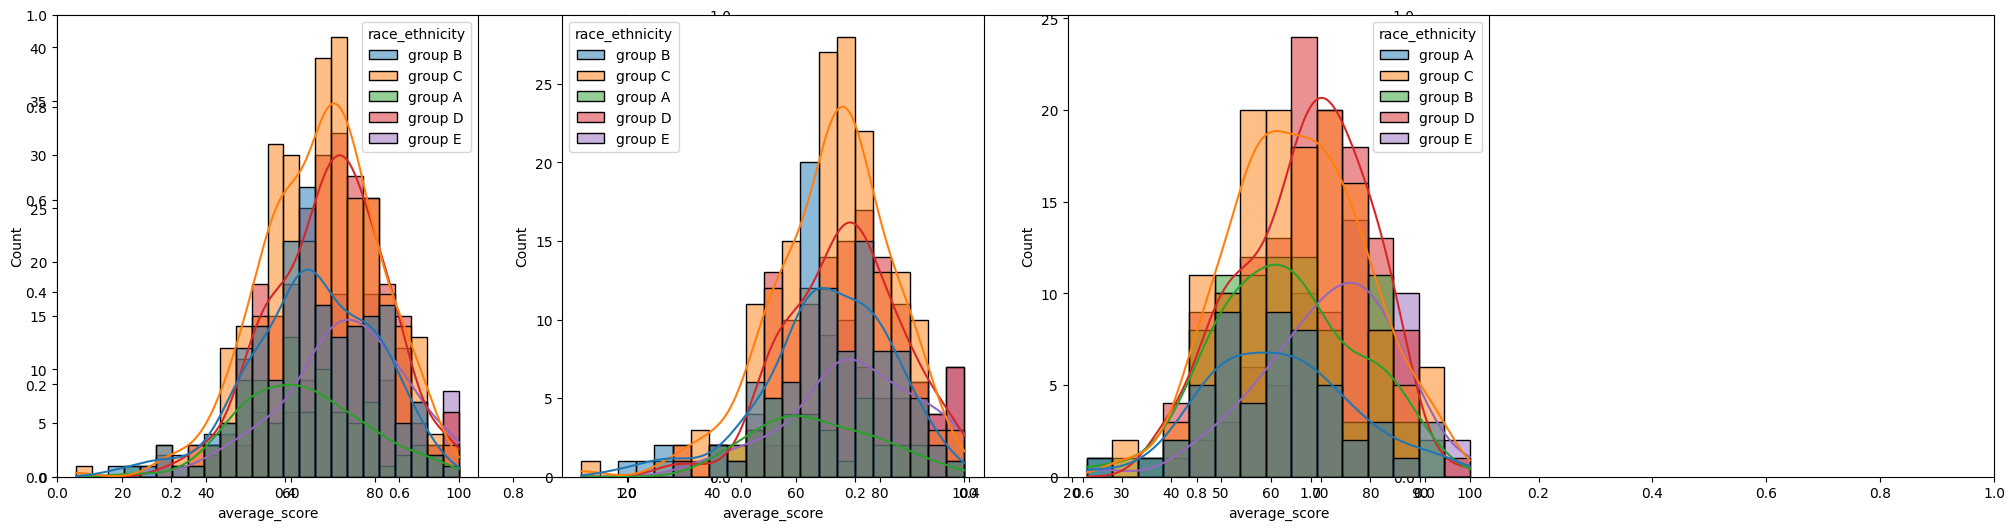

In [94]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

### Observation:
Students of group A and group B perform poorly in exams irrespective of whether they are male or female

### 4.2 Maximum score of students in all three subjects

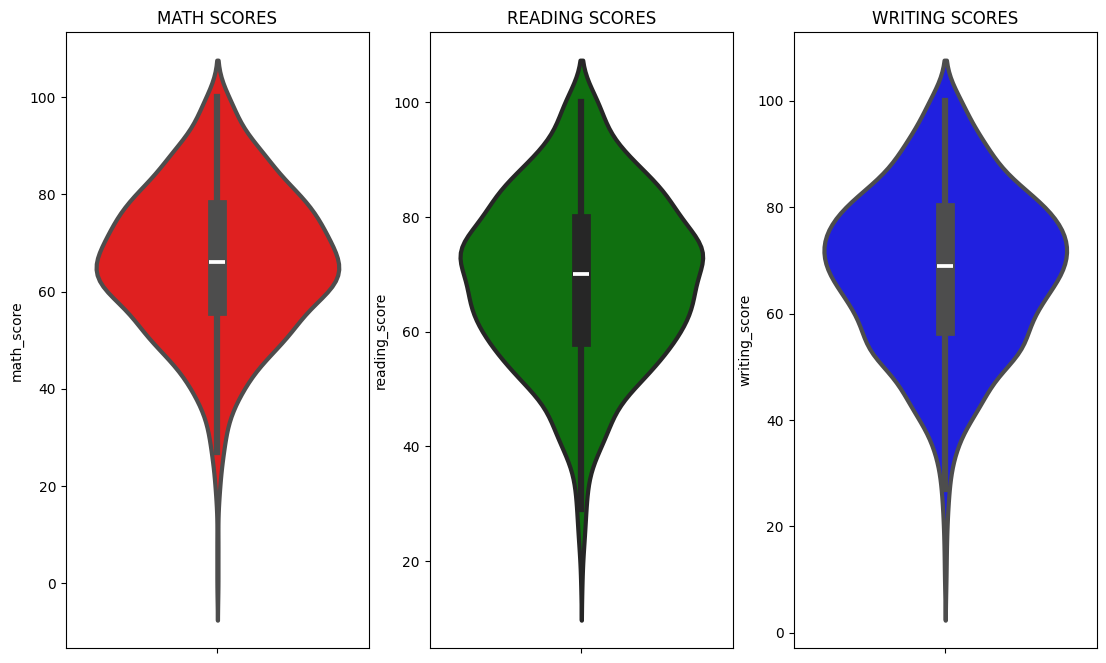

In [96]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

## Observation:
Most students score between 60-80 in maths, whereas for reading and writing the scores seem much more distributed

### BONUS: Why did we use violin plot for maximum marks?

Because it shows:

1. The shape of the distribution (e.g., most students scored near 100 or near 0).
2. Whether the data is skewed (e.g., most marks are on the higher or lower end).
3. If there are multiple peaks (e.g., some students aced the test, others failed).

### 4.3 Multivariate Analysis Using Pie Chart

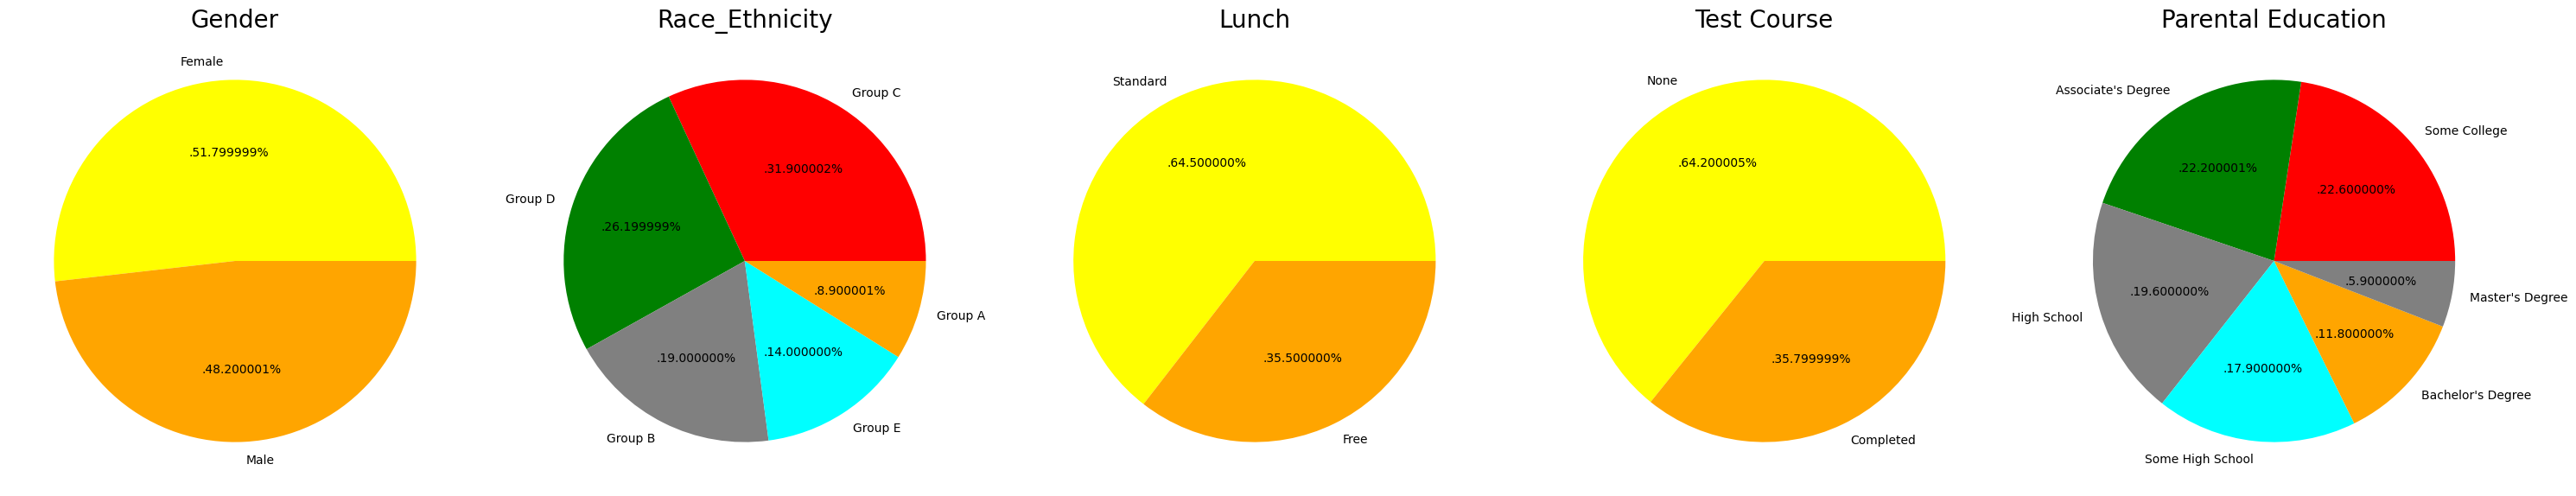

In [121]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['yellow','orange']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'grey', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['yellow','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['yellow','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'grey', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

### Observations:
1. Number of Male and Female students are almost equal.
2. Number students are greatest in Group C.
3. Number of students who have standard lunch are greater.
4. Number of students who have not enrolled in any test preparation course is greater.
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

### 4.4 Feature Wise Vizualisation

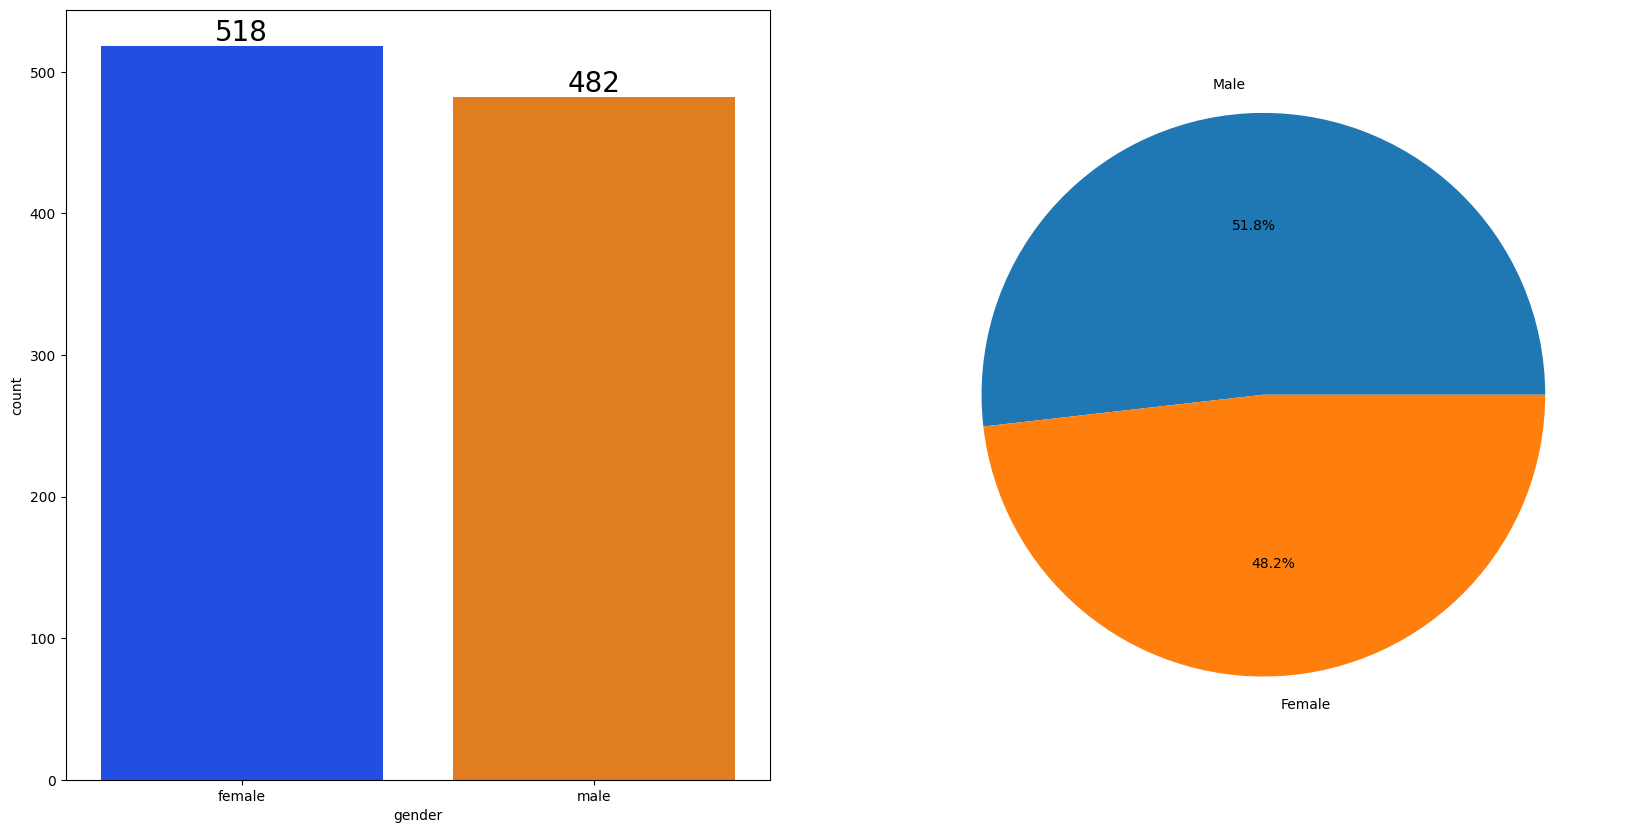

In [113]:
## gender
# We shall answer the following questions:
# 1. What is the distribution of male vs female?
# 2. Does gender have any impact on the average score?
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.show()